## 04_04: Functional techniques in Python

In [1]:
import functools

In [2]:
from turtle import Turtle, Terrarium

In [3]:
def drawkoch(turtle, distance, level):
    if level > 0:
        # draw the four components of the Koch shape (_/\_)
        # calling this function recursively for each
        drawkoch(turtle, distance/3, level-1)  # draw east _
        turtle.left(60)                                        
        drawkoch(turtle, distance/3, level-1)  # draw northeast /
        turtle.left(-120)
        drawkoch(turtle, distance/3, level-1)  # draw southeast \
        turtle.left(60)
        drawkoch(turtle, distance/3, level-1)  # draw east _
    else:
        # at the last level of recursion, draw a simple segment
        turtle.forward(distance)

In [4]:
with Terrarium() as t:
    drawkoch(Turtle(t), 100, 0)

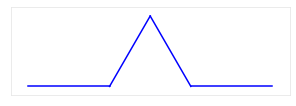

In [5]:
with Terrarium() as t:
    drawkoch(Turtle(t), 100, 1)

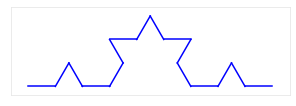

In [6]:
with Terrarium() as t:
    drawkoch(Turtle(t), 100, 2)

In [7]:
def snowflake(turtle, dist, level):
    for i in range(3):
        drawkoch(turtle, dist, level)
        turtle.right(120)

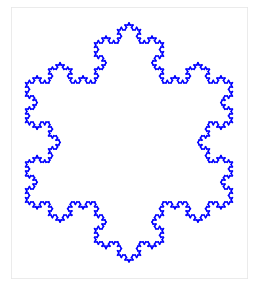

In [8]:
with Terrarium() as t:
    snowflake(Turtle(t), 100, 4)

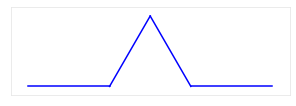

In [9]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    def f10():
        t1.forward(10)
    
    def l60():
        t1.left(60)

    def r60():
        t1.right(60)
        
    koch = [f10,l60,f10,r60,r60,f10,l60,f10]
    
    for f in koch:
        f()

In [10]:
def over(a, b):
    return a / b

In [11]:
inverse = functools.partial(over, 1)
half = functools.partial(over, b=2)

In [12]:
inverse

functools.partial(<function over at 0x1212940e0>, 1)

In [13]:
inverse(2)

0.5

In [14]:
half(3)

1.5

In [ ]:
# class Turtle:
#     ...
#
#     def forward(self, distance):
#         ...
#
#     ...

In [15]:
def F(dist):
    return functools.partial(Turtle.forward, distance=dist)

def L(ang):
    return functools.partial(Turtle.left, angle=ang)

def R(ang):
    return functools.partial(Turtle.right, angle=ang)

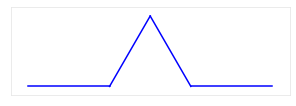

In [16]:
with Terrarium() as t:
    t1 = Turtle(t)
        
    # we could also write L(-120) instead of R(60),R(60) 
    koch = [F(10),L(60),F(10),R(60),R(60),F(10),L(60),F(10)]
    
    for f in koch:
        f(t1)

In [17]:
F(10)

functools.partial(<function Turtle.forward at 0x120b30680>, distance=10)

In [18]:
F(10).func

<function turtle.Turtle.forward(self, distance)>

In [19]:
F(10).keywords

{'distance': 10}

In [20]:
def kochiter(steps):
    newsteps = []
    
    for step in steps:
        if step.func is Turtle.forward:
            # if step is a segment, replace it with a Koch sequence
            # made using a shorter segment
            
            F3 = F(step.keywords['distance']/3)
            newsteps += [F3,L(60),F3,R(60),R(60),F3,L(60),F3]
        else:
            # if step is a turn, keep it as is
            
            newsteps += [step]
            
    return newsteps

In [21]:
segment = [F(100)]

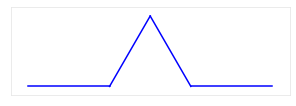

In [22]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    for f in kochiter(segment):
        f(t1)

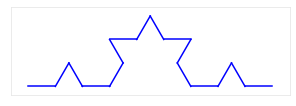

In [23]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    for f in kochiter(kochiter(segment)):
        f(t1)

In [24]:
def iterated(f, n):
    def iterf(arg):
        ret = arg
        for i in range(n):
            ret = f(ret)
        return ret
    
    return iterf

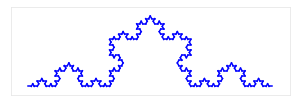

In [25]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    for f in iterated(kochiter, 4)(segment):
        f(t1)

In [26]:
def turtle_run(self, steps):
    for step in steps:
        step(self)
        
Turtle.run = turtle_run

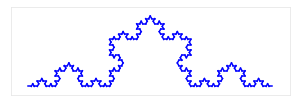

In [28]:
with Terrarium() as t:
    Turtle(t).run(iterated(kochiter, 4)(segment))

In [29]:
triangle = [F(100),L(-120),F(100),L(-120),F(100)]

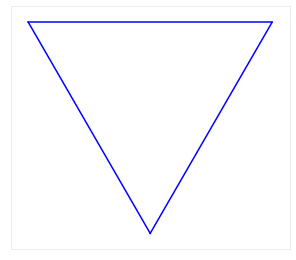

In [30]:
with Terrarium() as t:
    Turtle(t).run(triangle)

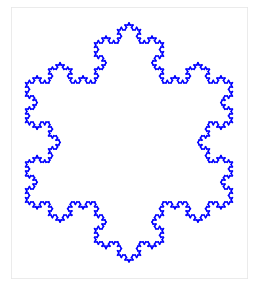

In [31]:
with Terrarium() as t:
    Turtle(t).run(iterated(kochiter, 4)(triangle))